In [1]:
# Most of this class we use regular expression to extract data

Sentiment Analysis
    
    Sentiment Analysis(opinion mining) is process of understanding teh opinion of an author about a subject
    
    3 elements of sentiment analysis
        
        1. opinion/emotion
            opinion(polarity): pos, neutral, neg
        2. subject
            subject of discussion - what is being talked about?
                - the camera on the new phone is great but the battery life is disappointing
        3. entity or opinion holder -by whom?
       
    

Applications of sentiment analysis

    1. Social media monitoring
    2. Brand monitoring
    3. Customer service
    4. Product analytics
    5. Market research and analytics
    

Sentiment analysis approaches

    Rule or lexicon based - rely on menaually created valence scores
    -- pretty fine list of words with valene score
    -- e.g. {nice:+2, good: +1, terrible:-3}
    Today was a good day
    Valence scores of words: Today:0, was:0, a:0, good:+1, day:0
    
    Automatic/machine learning
    We have a labelled data of reviews and sentiments and our machine learning models learns from it and predicts the sentiments of a new review
    When we do not have albelled data then we calcualte the sentiments using python Textblob library
    Returns the sentiment as a tuple of polarity( between -1 and 1) and subjectivity(between 0 and 1)
    

SENTIMENT VALENCE USING TEXTBLOB

In [4]:
text = 'Today was a great day'
from textblob import TextBlob
valence = TextBlob(text)
valence.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [10]:
reviews = [
    "The movie stretched to an infinity. Unbearable overacting by Pooja Hegde, cringeworthy dialogues, nonsensical storyline, and terrible direction, all make it a kind of torture to sit through. And that bloody, blaring background music in every freaking scene was so irritating. The only thing bearable was the performance of Akhil, the usual disposable jabardast comedy, the cinematography, and the music. A forgettable piece of mess. Ayyagaaru probably needs a relaunch again. At this point, I kinda do feel sad for him.",
    "Boring Story, Terrible Screenplay, Horrible Acting, Routine Music and Photography, Outdated Direction. Rich Production Values, Hot Actress. Recommended for weekend Popcorn audience.",
    "Akhil garu performance is very good, Pooja is beautiful and delivers a good performance as usual, from first to last scene the movie is so entertaining.",
    '''I like Akhil, I like his movies, acting, style, etc. I liked "Hello" "Mr. Majnu" and even "Akhil movie" was ok attempt to me...so when I give this rating it's only because of movie, it's quite boring to me. It's also a really problematic theme...People said there's comedy and entertainment but I don't think there's much, Akhil acting improve a lot though. I am glad he finally got a HIT, definitely well deserved actor, but I don't think it should be for this movie. "Hello" and even "Mr. Majnu" are far better in entertainment and pacing, even though both are "flops." That's it, go for time pass I guess, but even for that I found it boring.''',
    "First things first this movie makes no sense Disappointed with the director I had no hopes on Akhil and pooja and I was right about them Pooja Hegde you simply can't act and all your movies are non sense till today Akhils acting was so terrible and much better than female lead though Movie can give you a very bad head ache so please stop believing in rumours that it was a huge hit and all because they are all fake.",
    "Decent movie..nothing much to say about this one..neat and clean throughout..just enjoy this movie in theatre for once..one time entertainer..Just another chill movie for the weekend..",
    "It somehow works dude, atleast for some audience, out dated and lame comedy, above average performances and excellent songs and BGM, surely a one time watch."
]

for review in reviews:
    valence = TextBlob(review)
    print(valence.sentiment)

Sentiment(polarity=-0.3075, subjectivity=0.6525)
Sentiment(polarity=-0.3964285714285714, subjectivity=0.7476190476190475)
Sentiment(polarity=0.4228571428571429, subjectivity=0.5328571428571429)
Sentiment(polarity=0.042857142857142864, subjectivity=0.6214285714285713)
Sentiment(polarity=-0.12285714285714283, subjectivity=0.5619047619047619)
Sentiment(polarity=0.2833333333333333, subjectivity=0.5166666666666667)
Sentiment(polarity=0.16999999999999998, subjectivity=0.6277777777777778)


# > 0 is positive

### Very useful visuzalization in sentiment analysis:
worldcloud or textcloud

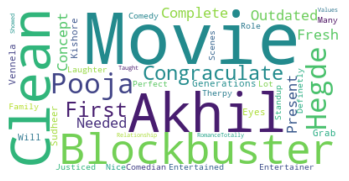

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white').generate("First Of All I would Like To Congraculate Akhil For A Complete Clean Blockbuster The Movie Is Not At All An Outdated Movie Its A Fresh Concept Which Is Needed For The Present Generations Pooja Hegde And Akhil Will Just Grab Our Eyes Sudheer And Vennela Kishore Just Entertained A Lot The Comedy Scenes Are Very Nice Its A Very Perfect Family Entertainer Its Definetly A Laughter Therpy And Pooja Hegde Justiced The Role Of Standup Comedian There Are Many Relationship Values Taught In This Movie They Showed What Is RomanceTotally The Movie Is A Clean Blockbuster.")
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Data Expolarition for sentiment analysis

In [18]:
import pandas as pd
# imdb reviews are being modelled which I have done in another notebook
# Created wordcloud for both positive and negative sentiment be eliminating common stop words

Ngrams with countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(min_n, max_n)

only unigrams

ngram_range = (1,1)

unigrams and bigrams

ngram_range=(1,2)

In [23]:
df = pd.read_csv('../IMDB Dataset.csv').head(1000)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [24]:
df.shape

(1000, 2)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
# build the vectorizer and specify the max features

vect=CountVectorizer(max_features=1000)

# fit the vectorizer
X = vect.fit_transform(df['review'])
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   10  100  20  able  about  above  absolutely  across  act  acted  ...  year  \
0   0    0   0     0      1      0           0       0    0      0  ...     0   
1   0    0   0     0      1      0           0       0    0      0  ...     0   
2   0    0   0     0      0      0           0       0    0      0  ...     0   
3   1    0   0     0      0      0           0       0    0      0  ...     0   
4   0    0   0     0      2      0           0       0    0      0  ...     0   

   years  yes  yet  you  young  your  yourself  zombie  zombies  
0      0    0    0    3      0     1         0       0        0  
1      0    0    0    1      0     0         0       0        0  
2      1    0    0    0      1     0         0       0        0  
3      0    0    0    2      0     0         0       2        0  
4      0    0    0    0      0     0         0       0        0  

[5 rows x 1000 columns]


In [26]:
# create bag of words with ngrams and vocabulary size
from sklearn.feature_extraction.text import CountVectorizer
# build the vectorizer and specify the max features

vect=CountVectorizer(max_features=1000, ngram_range=(2,2), max_df=500)

# fit the vectorizer
X = vect.fit_transform(df['review'])
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   ability to  able to  about how  about it  about the  about this  about to  \
0           0        0          0         0          0           0         0   
1           0        0          0         0          0           0         0   
2           0        0          0         0          0           0         0   
3           0        0          0         0          0           0         0   
4           0        0          0         0          1           0         0   

   acting and  acting is  acting was  ...  you ll  you may  you re  \
0           0          0           0  ...       1        1       0   
1           0          0           0  ...       0        0       0   
2           0          0           0  ...       0        0       0   
3           0          0           0  ...       0        0       1   
4           0          1           0  ...       0        0       0   

   you really  you see  you think  you to  you ve  you want  you will  
0           0        0    

CREATE NEW FEATURES FROM TEXT

In [33]:
# Create length of review feature
len_tokens = []
from nltk import word_tokenize

word_tokens = [word_tokenize(review) for review in df.review]
# iterate over the word tokens
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))
    
# create the new feature 
df['n_words'] = len_tokens

df.head()

,review,sentiment,n_words
0,One of the other reviewers has mentioned that ...,positive,380
1,A wonderful little production. <br /><br />The...,positive,201
2,I thought this was a wonderful way to spend ti...,positive,205
3,Basically there's a family where a little boy ...,negative,175
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,283


In [34]:
# calculate the average positive and negative review length
df.groupby('sentiment')['n_words'].mean()

sentiment
negative    275.927856
positive    282.648703
Name: n_words, dtype: float64

In [40]:
# Stemming and Lemmatization from a string
from nltk.stem import PorterStemmer
porter = PorterStemmer()

text = df['review'][0]
tokens = word_tokenize(text)

import time

# log of the start time
start_time = time.time()

# build the stemmed list 
stemmed_tokens = [porter.stem(token) for token in tokens]

# log the end time

end_time = time.time()
print('Time for stemming in seconds :', end_time - start_time)
print('stemmed tokens :', stemmed_tokens)

Time for stemming in seconds : 0.014008522033691406
stemmed tokens : ['one', 'of', 'the', 'other', 'review', 'ha', 'mention', 'that', 'after', 'watch', 'just', '1', 'oz', 'episod', 'you', "'ll", 'be', 'hook', '.', 'they', 'are', 'right', ',', 'as', 'thi', 'is', 'exactli', 'what', 'happen', 'with', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'wa', 'it', 'brutal', 'and', 'unflinch', 'scene', 'of', 'violenc', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', '.', 'trust', 'me', ',', 'thi', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'heart', 'or', 'timid', '.', 'thi', 'show', 'pull', 'no', 'punch', 'with', 'regard', 'to', 'drug', ',', 'sex', 'or', 'violenc', '.', 'it', 'is', 'hardcor', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'it', 'is', 'call', 'oz', 'as', 'that', 'is', 'the', 'nicknam', 'given', 'to', 'the', 'oswald', 'maximum', 'secur', 'st

In [41]:
# Stemming and Lemmatization from a string
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

text = df['review'][0]
tokens = word_tokenize(text)

import time

# log of the start time
start_time = time.time()

# build the stemmed list 
stemmed_tokens = [wnl.lemmatize(token) for token in tokens]

# log the end time

end_time = time.time()
print('Time for lemmatizing in seconds :', end_time - start_time)
print('stemmed tokens :', stemmed_tokens)

Time for stemming in seconds : 2.3519606590270996
stemmed tokens : ['One', 'of', 'the', 'other', 'reviewer', 'ha', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', 'you', "'ll", 'be', 'hooked', '.', 'They', 'are', 'right', ',', 'a', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'wa', 'it', 'brutality', 'and', 'unflinching', 'scene', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', '.', 'Trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'This', 'show', 'pull', 'no', 'punch', 'with', 'regard', 'to', 'drug', ',', 'sex', 'or', 'violence', '.', 'Its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'It', 'is', 'called', 'OZ', 'a', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald

In [46]:
# Sentiment analysis of the imdb dataset using logistic regression
# where 0 is the negative sentiment and 1 is the positive sentiment
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, ngram_range=(1,2), max_df=500)

# fit the vectorizer
X = vect.fit_transform(df.review)

# print the bag of words represenation
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
X=X_df
y=df.sentiment

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [48]:
# fit the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.77      0.77      0.77       104
    positive       0.75      0.75      0.75        96

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



# END